In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madag\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# Step 1: Sample Social Media Data
data = {
    'text': [
        "I love this product! It works like a charm 😍",
        "Worst service ever. Completely disappointed!",
        "Not bad, but could be better.",
        "Amazing experience, fast delivery 👌",
        "I'm so frustrated with this app.",
        "It's okay. Nothing special.",
        "Super happy with the support team!",
        "I don't like the new update.",
        "Everything works fine. No issues.",
        "This is the worst thing I've ever used!"
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'negative']
}

df = pd.DataFrame(data)

In [3]:
# Step 2: Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [4]:
# Step 3: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

In [5]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train the Classifier
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

In [8]:
# Step 7: Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



C:\Users\madag\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madag\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


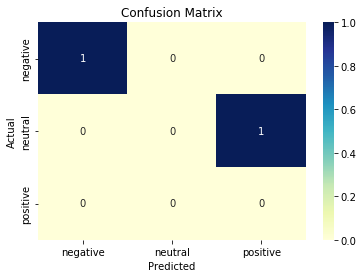

In [9]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

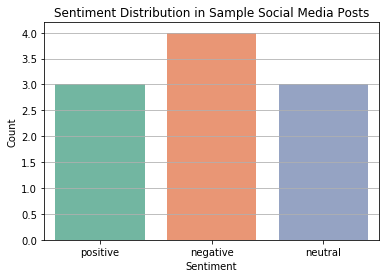

In [10]:
# Step 9: Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution in Sample Social Media Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()